# ESTADÍSTICA INFERENCIAL

Clase 13/07/2023

**Llegar a conclusiones sobre una población o una muestra a partir de hechos fácticos (datos, medidas, eventos) utilizando métodos estadísticos y considerando la incertidumbre inherente a dichas conclusiones**

Realizar un análisis predictivo a partir de un conjunto de datos.

Realizar una caracterización partiendo de datos, buscando correlaciones, determinando las medidas de tendencia central(Media, mediana y error estándar de la media). 

**Es fundamental en la toma de desiciones basadas en datos**

### Error Estándar de la media (SEM Standard Error of the Mean)

Medida de la precisión de la estimación de la altura media de la población basada en la muestra

$$ \sigma_ {\bar x}  = \frac {\sigma}{\sqrt{n}} $$


La media y la desviación estándar siempre tienen las mismas unidades



### Tamaño de la muestra

Es importante considerar varios criterios para obtener resultados confiables y representativos de la población. Los resultados obtenidos dependen del tamaño de la muestra.

Criterios:
1. **Nivel de confianza deseado:** Cuando mayor sea el nivel de confianza deseado, mayor deberá ser el tamaño de la muestra.
2. **Tamaño de la población:** Si la población es pequeña, se requerirá un tamaño de muestra relativamente mayor para obtener resultados confiables.
3. **Variabilidad en los datos:** Si los datos de la población presentan una alta variabilidad (alta dispersión de los datos), se necesitará un tamaño de muestra más grande
4. **Tamaño de efecto:** Si se espera que las diferencias o efectos a estimar sean pequeños, puede ser necesario un tamaño de muestra más grande para detectar esas diferencias de manera confiable.
5. **Recursos disponibles:** Tiempo, presupuesto y personal, un tamaño de muestra más grande requerirá más recursos.

*Ejemplo:* Estaturas de estudiantes

In [1]:
import numpy as np
import matplotlib.pyplot as plt

media: 0.0010164, 
Desviavión estándar: 0.9988368323329004


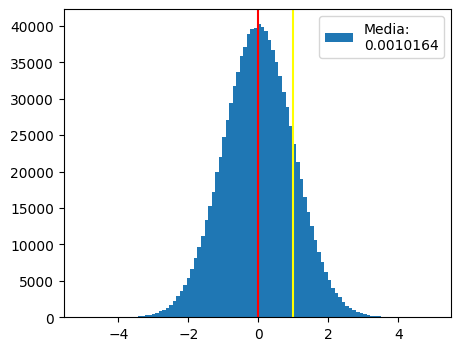

In [19]:
# Distribución normal o Gaussiana estándar: Promedio= 0 y desviación estándar = 1
N = 10**6
z = np.random.randn(N) # Generación de números aleatorios con distribución normal estándar 
μ = z.mean().round(7)
σ = z.std()
print(f'media: {μ}, \nDesviavión estándar: {σ}')

plt.figure(figsize= (5,4))
plt.hist(z, bins= 100, label= f'Media:\n{μ}')
plt.axvline(μ, color ='red')
plt.axvline(μ + σ, color ='yellow')
plt.legend()
plt.show()

Considero estudiantes con $ \mu = 170 $ y $\sigma = 5 $ 

media: 170.00081 
Desviavión estándar: 4.9997421277401894


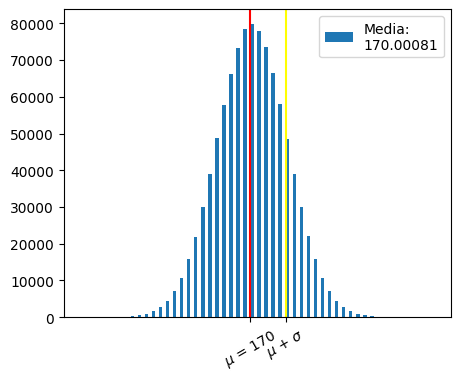

In [30]:
N = 10**6
np.random.seed(100)
# Genera números con distribución normal de media 170 y desviación estándar 5
z = (5*np.random.randn(N) + 170).round(0) 
μ = z.mean().round(7)
σ = z.std()
print(f'media: {μ} \nDesviavión estándar: {σ}')

plt.figure(figsize= (5,4))
plt.hist(z, bins= 100, label= f'Media:\n{μ}')
plt.axvline(μ, color ='red')
plt.axvline(μ + σ, color ='yellow')
plt.xticks([170, 175], ['$\mu$ = 170', '$\mu$ + $\sigma$'], rotation= 30)
plt.legend()
plt.show()

In [31]:
z.min()

146.0

In [32]:
z.max()

196.0

In [49]:
# Selecciono una muestra de z
sample = np.random.choice(z, 3) 
print(sample, '\nMedia:',sample.mean().round(2))

[172. 166. 168.] 
Media: 168.67
